## Third Part
#### The Relation between the Coherence Length and the Recipocal Vector with Bloch Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import *
import scipy.sparse as sparse

In [2]:
Sx = np.array([[0,0.5],[0.5,0]])
Sy = np.array([[0,-0.5j],[0.5j,0]])
Sz = np.array([[0.5,0],[0,-0.5]])
I = np.array([[1,0],[0,1]])
sparse.csr_matrix(Sx)
sparse.csr_matrix(Sy)
sparse.csr_matrix(Sz)
sparse.csr_matrix(I)

# Useful algorithm: rotation
def Hx(N):
    M = [Sx]+ [I]*(N-1) + [Sx]+ [I]*(N-1)  #append: For example, [Sx, I, I, I] + [Sx, I, I, I] = [Sx, I, I, I, Sx, I, I, I]
    ans = []
    for i in range(N):
        tmp = np.array([1,])
        for j in range(N):
            tmp = sparse.kron(tmp, M[i + j],format='csr')  #M[i + j]: swift by one index with the change in i, and sweep with the change in j
        ans.append(tmp)
    return sum(ans)

def Hxx(N):
    M = [Sx]*2+ [I]*(N-2) + [Sx]*2+ [I]*(N-2)  #append: For example, [Sx, Sx, I, I] + [Sx, Sx, I, I] = [Sx, Sx, I, I, Sx, Sx, I, I]
    ans = []
    for i in range(N):
        tmp = np.array([1,])
        for j in range(N):
            tmp = sparse.kron(tmp, M[i + j],format='csr')  #M[i + j]: swift by one index with the change in i, and sweep with the change in j
        ans.append(tmp)
    return sum(ans)

def Hz(N):
    M = [Sz]+ [I]*(N-1) + [Sz]+ [I]*(N-1)  #append: For example, [Sz, I, I, I] + [Sz, I, I, I] = [Sz, I, I, I, Sz, I, I, I]
    ans = []
    for i in range(N):
        tmp = np.array([1,])
        for j in range(N):
            tmp = sparse.kron(tmp, M[i + j],format='csr')  #M[i + j]: swift by one index with the change in i, and sweep with the change in j
        ans.append(tmp)
    return sum(ans)

4
6
8


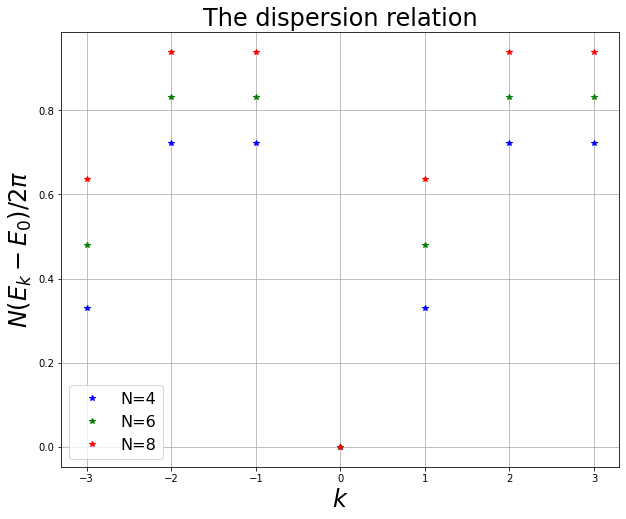

In [11]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,8))
J = 1
tmp = 0
color = ['b', 'g', 'r']

for N in [4, 6, 8]:
    print(N)
    coordx, coordy = [], []
    h = np.linspace(0.01,1)
    delta_E = np.zeros([100, h.shape[0]+1])
    for k in [-3, -2, -1, 0, 1, 2, 3]:
        for i in range(h.shape[0]):
            H = -J*Hxx(N)-h[i]*Hz(N)
            w, v = eigsh(H, 4, which='SA')
            delta_E[k][i] = w[k] - w[0]
        coordx.append(k)
        coordy.append(N*delta_E[k][i]/(2*np.pi))
    
        # dispersion relation
    ax.plot(coordx, coordy, color[tmp] + '*', label='N={}'.format(N))
    ax.set_title(r"The dispersion relation",fontsize=24)
    ax.set_xlabel(r'$k$',fontsize=24)
    ax.set_ylabel(r'$N(E_k-E_0)/2\pi$',fontsize=24)
    ax.grid()   
    tmp += 1
    ax.legend(fontsize=16)